# Exploring the Satellite Imagery in Python

### Importing the image

In [2]:
import math
import rasterio
import matplotlib.pyplot as plt

image_file = "image.tif"
sat_data = rasterio.open(image_file)

### Calculating the dimensions of the image on earth in metres

In [2]:
width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 19347.0, Height: 17406.0


### Rows and Columns

In [3]:
print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

Rows: 5802, Columns: 6449


### Converting the pixel co-ordinates to longitudes and latitudes

In [4]:
# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = sat_data.height - 1
col_max = sat_data.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = sat_data.transform * (row_min, col_min)
botright = sat_data.transform * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (505761.0, 2180130.0)
Bottom right corner coordinates: (523164.0, 2160786.0)


### Bands

The image that we are inspecting is a multispectral image consisting of 4 bands int he order B,G,R,N where N stands for near infrared.each band is stored as a numpy array.

In [5]:
print(sat_data.count)

# sequence of band indexes
print(sat_data.indexes)

4
(1, 2, 3, 4)


## Visualising the Satellite Imagery

We will use matplotlib to visualise the image since it essentially consists of arrays.

In [4]:
# Load the 4 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
b, g, r, n = sat_data.read()

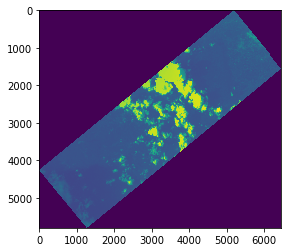

In [7]:
# Displaying the blue band.

fig = plt.imshow(b)
plt.show()


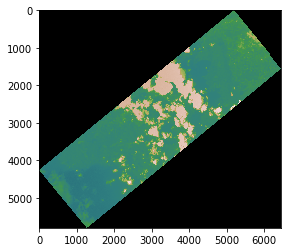

In [8]:
# Displaying the green band.

fig = plt.imshow(g)
fig.set_cmap('gist_earth')
plt.show()

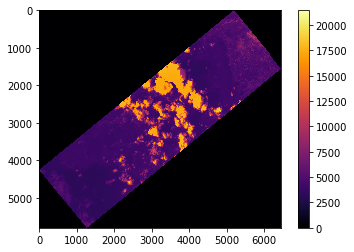

In [5]:
# Displaying the red band.

fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()

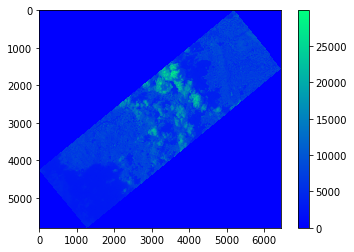

In [9]:
# Displaying the infrared band.

fig = plt.imshow(n)
fig.set_cmap('winter')
plt.colorbar()
plt.show()